# EAS 4610 - Earth Systems Modeling - Final Project
## Atmospheric/Shallow Water Gravity Waves
### By: Carson Clements, Kate Breeden
### Due: Tuesday, December 6th
### Requirements/Rubric: https://gatech.instructure.com/courses/261984/assignments/1234642
### Original Paper (Internal Gravity Waves in the Atmosphere): https://reader.elsevier.com/reader/sd/pii/S007461420480041X?token=0857787B8B9E9271C8A60B92489BEFF2C13E45CB9E82B096A270BAF36C9140939E1555793F0E0CF14F4AF85AECACF9A9&originRegion=us-east-1&originCreation=20221129172936

List of Requirements
## Introduction

## Equations

## Numerical Methods

## Results

## Figures

## WaveEqnDemo Base
### Created by: Dr. Robel
### Minor Edits by: Carson Clements, Kate Breeden

### Necessary Imports

In [1031]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
from scipy.sparse import spdiags
from matplotlib.animation import FuncAnimation

# Enable interactive plot
%matplotlib notebook
%matplotlib notebook

### Parameters to Consider

In [1032]:
alpha1 = 1
alpha2 = 2
L = 30.0
xt = 15
tf = 100.0

### Assembling the Grid

<IPython.core.display.Javascript object>


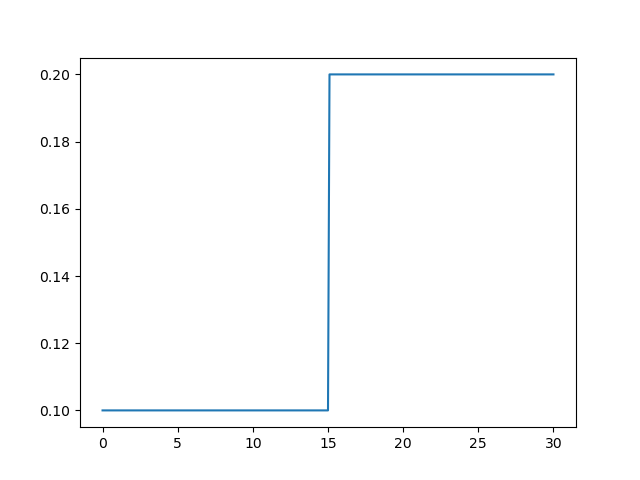

In [1033]:
nx = 301
nt = 10000

x = np.linspace(0,L,nx) # Need L to evenly divide into nx
t = np.linspace(0,tf,nt) # Need tf to evenly divide into nt

dt = t[1]-t[0]
dx = x[1]-x[0]

lam = np.zeros(nx)
lam[x<=xt] = alpha1*dt/dx
lam[x>xt] = alpha2*dt/dx

plt.figure(1)
plt.plot(x,lam)

### Pre-Allocating Variables and Initial Conditions

In [1034]:
u = np.nan*np.ones([nx,nt])
u[:,0] = np.exp(-(x**2) / 2)
u[:,1] = np.exp(-(x**2) / 2)

### Making the Tridiagonal Matrix

In [1035]:
data = np.array([(lam**2)*np.ones(nx), 2*(1-lam**2)*np.ones(nx), (lam**2)*np.ones(nx)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, nx, nx).toarray()

### Establishing Boundary Conditions

In [1036]:
#Reflective BC
M[0,0] = 2-lam[0]**2
M[-1,-1] = 2-lam[-1]**2

### Solving the Equation

In [1037]:
for k in np.arange(nt-2):
    u[:,k+2] = np.matmul(M,u[:,k+1]) - u[:,k]

### Plotting the Solution

<IPython.core.display.Javascript object>


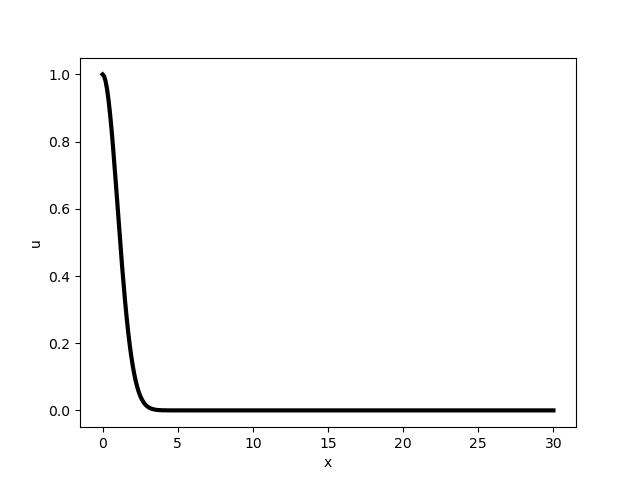

In [1038]:
for k in range(1, 10, nt):
    plt.figure(2)
    plt.plot(x,u[:,k], 'k', linewidth=3)
    plt.xlabel('x')
    plt.ylabel('u')
    #set(gca,fontsize=20)

# Creating the Wave Function
## Case 1 - c (or alpha) is Constant in Space

### Parameters to (re)Consider

In [1039]:
#alpha = u + or - sqrt(gravity * Height or Mean Depth of Lower Layer)
# Have to modify above equation to fit two alpha values'
# Assume perturbation values can be neglected because H >> h'
# Assume two layers we're dealing with are water (bottom) and air (top)
# h' = A*e^(ik[x-(u+sqrt(gH))t]) What is A? i & k are time and place step, respectively
# Remember: default equation is partial 2nd time (t) derivative of h' + c^2 * partial 2nd space (x) derivative of h' = 0
g = 9.81 #m/(s^2) - average gravitational acceleration
H = 3700 #m - also the average depth of the ocean
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
# The following are based upon the assumption that the upper layer is air and the lower layer is water
c1 = u_Line_Stable + ma.sqrt(g*H)
c2 = u_Line_Reverse - ma.sqrt(g*H)
x_Scale = 1.0 #5000 #m - part of a 5km space scale
t_Scale = 1.0 #60 #s - minute time scale

### Assembling a New Grid

In [1040]:
x_Total = 504 #28385000 #m - "circumference" of the Earth at 45 degrees latitude (mid-latitudes)
    # originally shortened to 568 proportionally, modified to 504 to divide evenly into t_Total
t_Total = 8064 #1209600 #s - amount of time for an individual air parcel to circumnavigate the globe in the mid-latitudes (roughly 2 weeks)

x_Array = np.linspace(0,x_Scale,x_Total) # Need x_Scale to evenly divide into x_Total
t_Array = np.linspace(0,t_Scale,t_Total) # Need t_Scale to evenly divide into t_Total

delta_t = t_Array[1]-t_Array[0] #time step
delta_x = x_Array[1]-x_Array[0] #space step

lam_Stable = np.zeros(x_Total) #Creating the stable c/alpha case
for i in np.arange(x_Total):
    lam_Stable[i] = c1*delta_t/delta_x #Establishing the stable c/alpha case

lam_Reverse = np.zeros(x_Total) #Creating the stable c/alpha case with opposite flow
for i in np.arange(x_Total):
    lam_Reverse[i] = c2*delta_t/delta_x #Establishing the above case

### Creating the two Matrices and Allocating for Space Within Them

In [1041]:
stable_u = np.nan*np.ones([x_Total,t_Total])
stable_u[:,0] = np.exp(-(x_Array**2) / 2)
stable_u[:,1] = np.exp(-(x_Array**2) / 2)

reverse_u = np.nan*np.ones([x_Total,t_Total])
reverse_u[:,0] = np.exp(-(x_Array**2) / 2)
reverse_u[:,1] = np.exp(-(x_Array**2) / 2)

### Modifying the Matrices to Make Them Tridiagonal

In [1042]:
# Westerlies in mid-latitudes
stable_Data = np.array([(lam_Stable**2)*np.ones(x_Total), 2*(1-lam_Stable**2)*np.ones(x_Total), (lam_Stable**2)*np.ones(x_Total)])
stable_Diags = np.array([-1, 0, 1])
stable_M = spdiags(stable_Data, stable_Diags, x_Total, x_Total).toarray()

# Now for the Other Option (aka westerlies are now easterlies)
reverse_Data = np.array([(lam_Reverse**2)*np.ones(x_Total), 2*(1-lam_Reverse**2)*np.ones(x_Total), (lam_Reverse**2)*np.ones(x_Total)])
reverse_Diags = np.array([-1, 0, 1])
reverse_M = spdiags(reverse_Data, reverse_Diags, x_Total, x_Total).toarray()
stable_M

array([[-310.95229676,  156.47614838,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 156.47614838, -310.95229676,  156.47614838, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  156.47614838, -310.95229676, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ..., -310.95229676,
         156.47614838,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,  156.47614838,
        -310.95229676,  156.47614838],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         156.47614838, -310.95229676]])

### Determining Appropriate Boundary Conditions

In [1043]:
#Reflective BC
stable_M[0,0] = 2-lam_Stable[0]**2
stable_M[-1,-1] = 2-lam_Stable[-1]**2

#Reflective BC
reverse_M[0,0] = 2-lam_Reverse[0]**2
reverse_M[-1,-1] = 2-lam_Reverse[-1]**2
lam_Stable[0]

12.509042664390382

### Solving the Wave Equation

In [1044]:
# First up, the normal case
for k in np.arange(t_Total-2):
    stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]
    
# And now the reverse!
for k in np.arange(t_Total-2):
    reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]

#Still Generating RuntimeWarnings due to overflow and invalid values in matmul - investigate asap

C:\Users\carso\AppData\Local\Temp/ipykernel_19232/3733149974.py:3: RuntimeWarning: overflow encountered in matmul
  stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_19232/3733149974.py:3: RuntimeWarning: invalid value encountered in matmul
  stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_19232/3733149974.py:7: RuntimeWarning: overflow encountered in matmul
  reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_19232/3733149974.py:7: RuntimeWarning: invalid value encountered in matmul
  reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]


### Plotting the Two Results

<IPython.core.display.Javascript object>


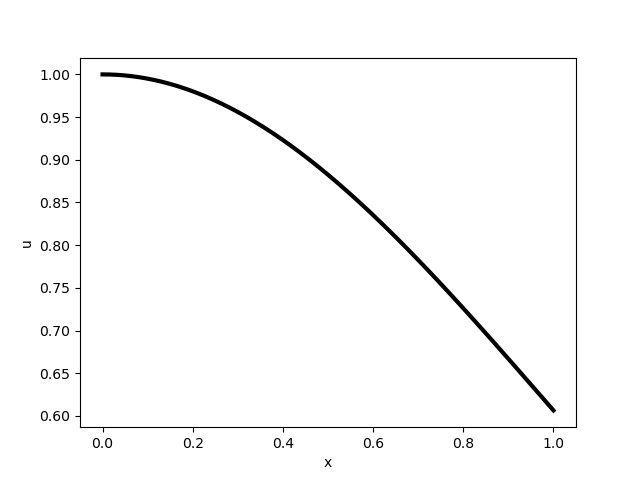

In [1045]:
#Normal Case is First
for k in range(1, 4, t_Total):
    plt.figure(3)
    plt.plot(x_Array,stable_u[:,k],'k',linewidth=3)
    plt.xlabel('x');
    plt.ylabel('u');

<IPython.core.display.Javascript object>


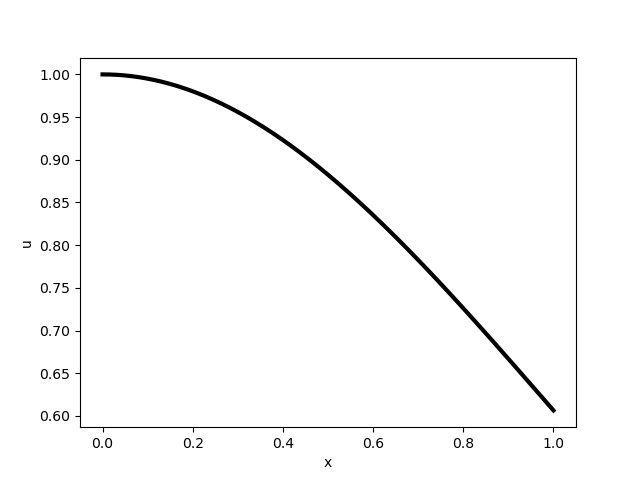

In [1046]:
#Reverse Case
for k in range(1, 4, t_Total):
    plt.figure(4)
    plt.plot(x_Array,reverse_u[:,k],'k',linewidth=3)
    plt.xlabel('x');
    plt.ylabel('u');

# Wave Function Part II
## Case 2 - c = c(x) [alpha = alpha(x)]

### Re-evaluating Parameters

In [1047]:
#H is now a function of x, which means c = c(x) and alpha = alpha(x) for both forward and reverse cases
#The rest of the parameters are still unchanged from Case 1 and can be recalled as is, though will be restated here
g = 9.81 #m/(s^2) - average gravitational acceleration
H = np.zeros(x_Total)
for i in np.arange(x_Total):
    H[i] = 10000*np.sin(i/126) #H is now a function of x in space, which means c = c(x) and alpha = alpha(x) 
                               #for both forward and reverse cases - simulates Atlantic/Pacific crossing
    if H[i] < 0:
        H[i] = 0
#The rest of the parameters are still unchanged from Case 1 and can be recalled as is, though will be restated here
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
c3 = np.zeros(x_Total)
c4 = np.zeros(x_Total)
for i in np.arange(x_Total):
    c3[i] = u_Line_Stable + ma.sqrt(g*H[i])
    c4[i] = u_Line_Reverse - ma.sqrt(g*H[i])

[   0.           79.36424619  158.7234934   238.07274296  317.40699684
  396.72125794  476.01053043  555.26982005  634.49413443  713.6784834
  792.81787932  871.90733736  950.94187585 1029.91651658 1108.8262851
 1187.66621106 1266.43132852 1345.11667621 1423.71729792 1502.22824278
 1580.64456554 1658.96132693 1737.17359396 1815.27644019 1893.26494611
 1971.13419937 2048.87929518 2126.49533653 2203.97743456 2281.32070884
 2358.52028768 2435.57130846 2512.46891789 2589.20827235 2665.78453822
 2742.19289211 2818.42852122 2894.48662365 2970.36240865 3046.05109697
 3121.54792116 3196.84812582 3271.94696796 3346.83971727 3421.52165642
 3495.98808135 3570.23430159 3644.25564053 3718.04743571 3791.60503917
 3864.92381767 3937.999153   4010.82644233 4083.40109841 4155.71854993
 4227.77424176 4299.56363528 4371.08220863 4442.325457   4513.28889295
 4583.96804663 4654.35846612 4724.45571768 4794.25538604 4863.75307467
 4932.94440606 5001.825022   5070.39058384 5138.6367728  5206.55929019
 5274.15

#H is now a function of x, which means c = c(x) and alpha = alpha(x) for both forward and reverse cases
#The rest of the parameters are still unchanged from Case 1 and can be recalled as is, though will be restated here
g = 9.81 #m/(s^2) - average gravitational acceleration
H = np.zeros(x_Total)
H = 5*np.sin(x_Array)
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
c3 = np.zeros(x_Total)
c4 = np.zeros(x_Total)
for i in np.arange(x_Total):
    c3[i] = u_Line_Stable + ma.sqrt(g*H[i])
    c4[i] = u_Line_Reverse - ma.sqrt(g*H[i])
H
